In [9]:
import shots_data_retriever
import importlib
import warnings
import pandas as pd

# Filter dtype warnings. Column 10 can contain str, int, and float types 
# which spams a warning in the output
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
importlib.reload(shots_data_retriever)

shotsDataRetriever = shots_data_retriever.ShotsDataRetriever()
all_shots = shotsDataRetriever.get_all_shots()

Retrieving shots data: 100%|██████████| 40/40 [02:29<00:00,  3.74s/it]

Index(['game_id', 'period', 'time_in', 'time_remaining', 'team_id', 'is_goal',
       'x_coord', 'y_coord', 'shooter_name', 'goalie_name', 'shot_type',
       'is_empty_net', 'situation_type'],
      dtype='object')


In [21]:
print(all_shots.columns)

Index(['game_id', 'period', 'time_in', 'time_remaining', 'team_id', 'is_goal',
       'x_coord', 'y_coord', 'shooter_name', 'goalie_name', 'shot_type',
       'is_empty_net', 'situation_type'],
      dtype='object')


In [26]:
# Average shot rate
total_shots = len(all_shots)
single_game_time = 1 # in hours, assumption from google doc
total_games = all_shots['game_id'].nunique()
total_game_time = single_game_time * total_games
average_shot_rate = total_shots / total_game_time # in shots per hour
print(average_shot_rate)

56.70828858732793


In [42]:
# Shot rate by team
total_shots_per_team = all_shots.groupby('team_id').size().reset_index(name='total shots')
total_game_time_per_team = all_shots.groupby('team_id')['game_id'].nunique().reset_index(name='time played (hours)')
merged_df = pd.merge(total_shots_per_team, total_game_time_per_team, on='team_id')
merged_df['shot rate per hour'] = merged_df['total shots'] / merged_df['time played (hours)']

print(merged_df)

    team_id  total shots  time played (hours)  shot rate per hour
0         1        19669                  634           31.023659
1         2        20211                  672           30.075893
2         3        20498                  673           30.457652
3         4        20003                  636           31.451258
4         5        22420                  671           33.412817
5         6        23289                  708           32.894068
6         7        19143                  617           31.025932
7         8        20227                  653           30.975498
8         9        19753                  638           30.960815
9        10        21978                  670           32.802985
10       12        23036                  687           33.531295
11       13        23354                  678           34.445428
12       14        22444                  718           31.259053
13       15        20650                  681           30.323054
14       1

In [3]:
# Temporary test

import plotly.express as px

# Create the shot map
fig = px.density_heatmap(team_df, x='x_coord', y='y_coord', z='is_goal', 
                          title=f'Shot Map for team 15', 
                          labels={'x_coord': 'X Coordinate', 'y_coord': 'Y Coordinate'},
                          color_continuous_scale='Viridis')

# Save as HTML
fig.write_html('team_shot_map.html')

NameError: name 'team_df' is not defined

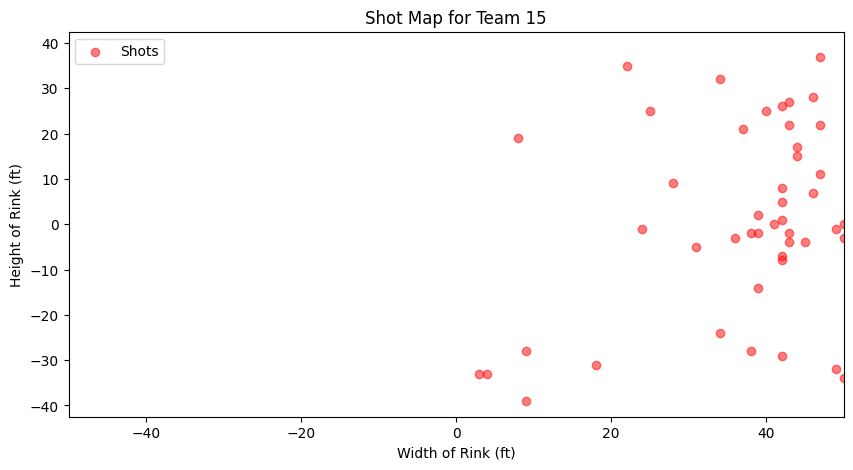

In [30]:
# Temporary test

import matplotlib.pyplot as plt

def plot_shot_map(df, team_name):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))

    # Create the rink layout (you may need to customize this)
    rink_width = 100
    rink_height = 85
    ax.set_xlim(-rink_width/2, rink_width/2)
    ax.set_ylim(-rink_height/2, rink_height/2)

    # Plot shot coordinates
    shot_x = df['x_coord']
    shot_y = df['y_coord']
    ax.scatter(shot_x, shot_y, color='red', alpha=0.5, label='Shots')

    # Labels and title
    ax.set_title(f'Shot Map for {team_name}')
    ax.set_xlabel('Width of Rink (ft)')
    ax.set_ylabel('Height of Rink (ft)')
    ax.legend()
    plt.show()

# Call the function with your filtered DataFrame and team name
plot_shot_map(team_df, "Team 15")  # Re